## Netflix Content Analysis

![Netflix](https://c.tenor.com/NerN41mjgV0AAAAC/netflix-intro.gif "netflix")

In [214]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot

from PIL import Image

In [215]:
import warnings
warnings.filterwarnings("ignore")

In [216]:
catalog = pd.read_csv('./netflix_titles.csv')
catalog.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [217]:
bi = np.random.binomial(n=5, p=0.75, size=len(catalog))

for i in range(len(bi)):
    if bi[i]==0: bi[i]=random.randint(1,max(bi))

In [218]:
catalog['star_rating'] = bi

In [219]:
catalog = catalog.reindex(columns = [col for col in catalog.columns if col != 'star_rating'] + ['star_rating'])

In [220]:
len(catalog)

8807

In [221]:
catalog.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
star_rating        0
dtype: int64

In [222]:
catalog.describe()

,release_year,star_rating
count,8807.000000,8807.000000
mean,2014.180198,3.736119
std,8.819312,0.962076
min,1925.000000,1.000000
25%,2013.000000,3.000000
50%,2017.000000,4.000000
75%,2019.000000,4.000000
max,2021.000000,5.000000


## Content Type on Netflix

In [288]:
cont_type = catalog['type'].value_counts().reset_index().rename(columns = {'index' : "type", "type": "count"})


chart = go.Pie(labels=cont_type['type'], values=cont_type['count'], pull=[0.05, 0.05], marker=dict(colors=['#b20710', '#221f1f']))

layout = go.Layout(title="Content Type", height=500, legend=dict(x=0.1, y=0.6))

fig = go.Figure(data=chart, layout = layout)

iplot(fig)

## Top 5 genres growth over the years

In [224]:
catalog['date_added'] = pd.to_datetime(catalog['date_added'])
catalog['date_added_year'] = catalog['date_added'].dt.year

In [225]:
genre = catalog
genre['listed_in'] = genre['listed_in'].str.split(', ')
genre = genre.explode('listed_in', ignore_index=True)
genre.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,star_rating,date_added_year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",5,2021.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",4,2021.0
2,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",4,2021.0


In [226]:
genre['listed_in'].unique()

array(['Documentaries', 'International TV Shows', 'TV Dramas',
       'TV Mysteries', 'Crime TV Shows', 'TV Action & Adventure',
       'Docuseries', 'Reality TV', 'Romantic TV Shows', 'TV Comedies',
       'TV Horror', 'Children & Family Movies', 'Dramas',
       'Independent Movies', 'International Movies', 'British TV Shows',
       'Comedies', 'Spanish-Language TV Shows', 'Thrillers',
       'Romantic Movies', 'Music & Musicals', 'Horror Movies',
       'Sci-Fi & Fantasy', 'TV Thrillers', "Kids' TV",
       'Action & Adventure', 'TV Sci-Fi & Fantasy', 'Classic Movies',
       'Anime Features', 'Sports Movies', 'Anime Series',
       'Korean TV Shows', 'Science & Nature TV', 'Teen TV Shows',
       'Cult Movies', 'TV Shows', 'Faith & Spirituality', 'LGBTQ Movies',
       'Stand-Up Comedy', 'Movies', 'Stand-Up Comedy & Talk Shows',
       'Classic & Cult TV'], dtype=object)

In [227]:
top10genres = genre['listed_in'].value_counts().reset_index()[:5]
top10genres

,index,listed_in
0,International Movies,2752
1,Dramas,2427
2,Comedies,1674
3,International TV Shows,1351
4,Documentaries,869


In [228]:
g1 = genre[genre["listed_in"] == "International Movies"]
g2 = genre[genre["listed_in"] == "Dramas"]
g3 = genre[genre["listed_in"] == "Comedies"]
g4 = genre[genre["listed_in"] == "International TV Shows"]
g5 = genre[genre["listed_in"] == "Documentaries"]

In [229]:
vc1 = g1['date_added_year'].value_counts().reset_index().rename(columns = {'date_added_year' : "count", "index" : 'date_added_year'})
vc1 = vc1.sort_values('date_added_year')

vc2 = g2['date_added_year'].value_counts().reset_index().rename(columns = {'date_added_year' : "count", "index" : 'date_added_year'})
vc2 = vc2.sort_values('date_added_year')

vc3 = g3['date_added_year'].value_counts().reset_index().rename(columns = {'date_added_year' : "count", "index" : 'date_added_year'})
vc3 = vc3.sort_values('date_added_year')

vc4 = g4['date_added_year'].value_counts().reset_index().rename(columns = {'date_added_year' : "count", "index" : 'date_added_year'})
vc4 = vc4.sort_values('date_added_year')

vc5 = g5['date_added_year'].value_counts().reset_index().rename(columns = {'date_added_year' : "count", "index" : 'date_added_year'})
vc5 = vc5.sort_values('date_added_year')

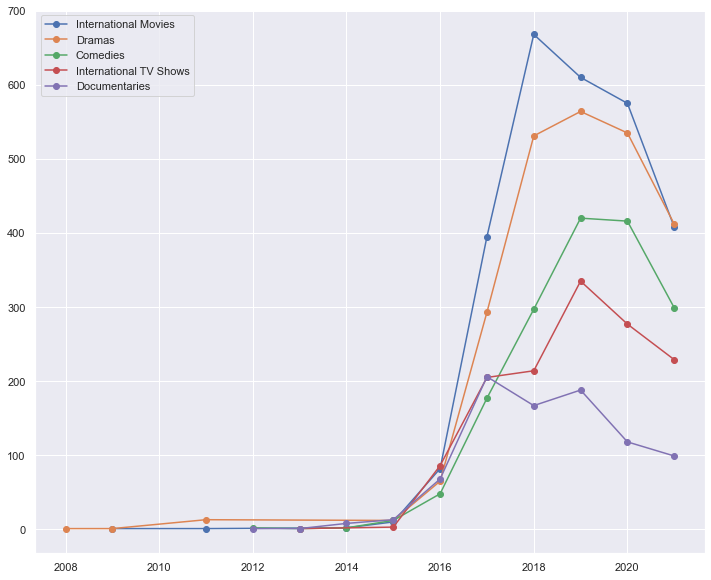

In [230]:
sns.set(style="darkgrid")
plt.figure(figsize=(12, 10))

plt.plot(vc1['date_added_year'], vc1['count'], '-o', label='International Movies')
plt.plot(vc2['date_added_year'], vc2['count'], '-o', label='Dramas')
plt.plot(vc3['date_added_year'], vc3['count'], '-o', label='Comedies')
plt.plot(vc4['date_added_year'], vc4['count'], '-o', label='International TV Shows')
plt.plot(vc5['date_added_year'], vc5['count'], '-o', label='Documentaries')


plt.legend()
plt.show()

## Classification

In [231]:
catalog['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [232]:
ratings = {
    'TV-PG': 'Niños mayores',
    'TV-MA': 'Adultos',
    'TV-Y7-FV': 'Niños mayores',
    'TV-Y7': 'Niños mayores',
    'TV-14': 'Adolescentes',
    'R': 'Adultos',
    'TV-Y': 'Niños',
    'NR': 'Adultos',
    'PG-13': 'Adolescentes',
    'TV-G': 'Niños',
    'PG': 'Niños mayores',
    'G': 'Niños',
    'UR': 'Adultos',
    'NC-17': 'Adultos'
}

catalog['clasificacion'] = catalog['rating'].replace(ratings)

In [233]:
catalog['clasificacion'].value_counts().reset_index().rename(columns={'index': 'rating', 'rating': 'rating counts'})[:4]

,rating,clasificacion
0,Adultos,4092
1,Adolescentes,2650
2,Niños mayores,1490
3,Niños,568


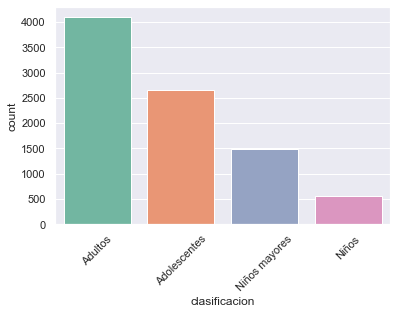

In [234]:
ax = sns.countplot(x="clasificacion", data=catalog, palette="Set2", 
                   order=catalog['clasificacion'].value_counts().index[0:4])
plt.xticks(rotation= 45)
plt.show()

In [235]:
catalog['star_rating'].describe()

count    8807.000000
mean        3.736119
std         0.962076
min         1.000000
25%         3.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: star_rating, dtype: float64

In [236]:
netflix_colors = ['#221f1f', '#b20710', '#e50914','#f5f5f1']

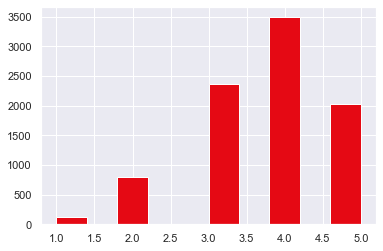

In [237]:
fig = plt.figure(figsize=(6,4))
plt.hist(catalog['star_rating'], color=netflix_colors[2])
plt.show()

## Is there any relationship between the classification and the rating?

In [238]:
catalog2 = catalog

In [239]:
catalog2 = catalog2[(catalog2['clasificacion'].notna()) & (catalog2['star_rating'].notna())]

In [240]:
cat = catalog2.drop(catalog2[catalog2['clasificacion'].isin(['66 min', '74 min', '84 min'])].index)

In [241]:
catalog_dummies = cat['clasificacion'].str.get_dummies()

In [242]:
catalog_no_nans = catalog[(catalog['clasificacion'].notna()) & (catalog['star_rating'].notna())]

In [243]:
catalog_no_nans.drop(catalog2[catalog2['clasificacion'].isin(['66 min', '74 min', '84 min'])].index, inplace=True)

In [244]:
catalog_dummies['star_rating'] = catalog_no_nans['star_rating']

In [245]:
sliced_ratings = catalog_dummies[['Adolescentes', 'Adultos', 'Niños', 'Niños mayores', 'star_rating']]

In [246]:
corr = sliced_ratings.corr()

corr.style.background_gradient(cmap='coolwarm')

,Adolescentes,Adultos,Niños,Niños mayores,star_rating
Adolescentes,1.000000,-0.611977,-0.172428,-0.296360,0.003795
Adultos,-0.611977,1.000000,-0.244890,-0.420905,0.010046
Niños,-0.172428,-0.244890,1.000000,-0.118592,-0.002139
Niños mayores,-0.296360,-0.420905,-0.118592,1.000000,-0.016601
star_rating,0.003795,0.010046,-0.002139,-0.016601,1.000000


## Years in which more content has been produced

In [247]:
pop_years = catalog.groupby('release_year').count().sort_values('title', ascending=False)['title'].reset_index()[:8]
pop_years.rename(columns={'title': 'produced content'}, inplace=True)
pop_years

,release_year,produced content
0,2018,1147
1,2017,1032
2,2019,1030
3,2020,953
4,2016,902
5,2021,592
6,2015,560
7,2014,352


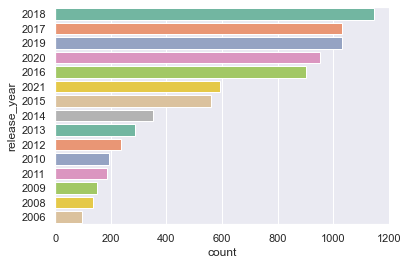

In [248]:
ax = sns.countplot(y="release_year", data=catalog, palette="Set2",
                   order=catalog['release_year'].value_counts().index[0:15])

## In which year did Netflix add the most content to its platform?

In [249]:
most_cont = catalog.groupby('date_added_year').count().sort_values('title', ascending=False)['title'].reset_index()[:8]
most_cont.rename(columns={'title': 'added content'}, inplace=True)
most_cont

,date_added_year,added content
0,2019.0,2016
1,2020.0,1879
2,2018.0,1649
3,2021.0,1498
4,2017.0,1188
5,2016.0,429
6,2015.0,82
7,2014.0,24


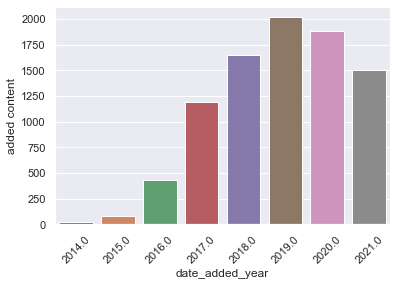

In [250]:
sns.barplot(x = most_cont['date_added_year'], y = most_cont['added content'])
plt.xticks(rotation=45)
plt.show()

In [251]:
dates = catalog.groupby(['date_added']).count().sort_values('date_added', ascending=False)['title'].reset_index().drop('title', axis=1)#.set_index('new_date')

In [252]:
dates['date_added'].min()

Timestamp('2008-01-01 00:00:00')

In [253]:
dates['date_added'].max()

Timestamp('2021-09-25 00:00:00')

## Most popular month for adding new content, regardless of year

In [254]:
catalog['date_added_month'] = catalog['date_added'].dt.month_name()
catalog.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,star_rating,date_added_year,clasificacion,date_added_month
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,[Documentaries],"As her father nears the end of his life, filmm...",5,2021.0,Adolescentes,September
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"[International TV Shows, TV Dramas, TV Mysteries]","After crossing paths at a party, a Cape Town t...",4,2021.0,Adultos,September
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"[Crime TV Shows, International TV Shows, TV Ac...",To protect his family from a powerful drug lor...,3,2021.0,Adultos,September


In [255]:
catalog.groupby('date_added_month').count().sort_values('title', ascending=False)['title'].reset_index()[:5]

,date_added_month,title
0,July,827
1,December,813
2,September,770
3,April,764
4,October,760


In [256]:
cata_date = catalog[['date_added_month', 'date_added_year']]
cata_date = cata_date[cata_date['date_added_year'].isin([2016.0, 2017.0, 2018.0, 2019.0, 2020.0, 2021.0])]

In [257]:
cata_date.date_added_year.unique()

array([2021., 2020., 2019., 2018., 2017., 2016.])

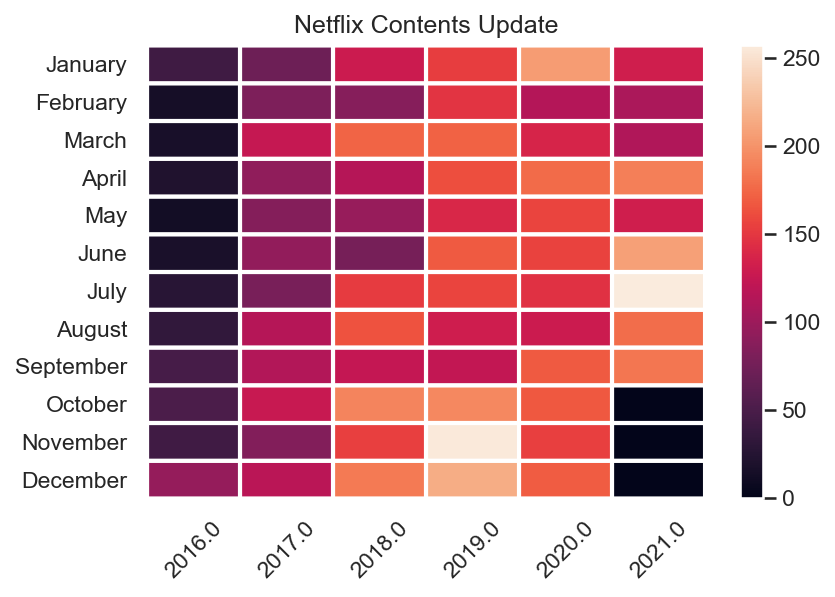

In [258]:
cata_date = cata_date[['date_added_month', 'date_added_year']].dropna()

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]#
df = cata_date.groupby('date_added_year')['date_added_month'].value_counts().unstack().fillna(0)[month_order].T

plt.figure(dpi=150)
plt.pcolor(df, edgecolors='white', linewidths=2)

plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns)
plt.yticks(np.arange(0.5, len(df.index), 1), df.index)

plt.title('Netflix Contents Update')
plt.xticks(rotation=45)
cbar = plt.colorbar()

plt.show()

## Countries where most content is produced

In [259]:
catalog['country_good'] = catalog['country'].str.split(', ')
catalog = catalog.explode('country_good', ignore_index=True)
catalog.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,star_rating,date_added_year,clasificacion,date_added_month,country_good
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,[Documentaries],"As her father nears the end of his life, filmm...",5,2021.0,Adolescentes,September,United States
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"[International TV Shows, TV Dramas, TV Mysteries]","After crossing paths at a party, a Cape Town t...",4,2021.0,Adultos,September,South Africa
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"[Crime TV Shows, International TV Shows, TV Ac...",To protect his family from a powerful drug lor...,3,2021.0,Adultos,September,NaN


In [260]:
joint_data=catalog.sort_values(by='star_rating', ascending=False)

In [261]:
country_count=joint_data['country_good'].value_counts().sort_values(ascending=False)
country_count=pd.DataFrame(country_count)
topcountries=country_count[0:11]
topcountries

,country_good
United States,3689
India,1046
United Kingdom,804
Canada,445
France,393
Japan,318
Spain,232
South Korea,231
Germany,226
Mexico,169


In [262]:
country_count.to_csv('Países vs contenidos')

In [263]:
netflix_colors

['#221f1f', '#b20710', '#e50914', '#f5f5f1']

In [264]:
lista_r = ['#221f1f', '#b20710', '#e50914', '#b20710', '#221f1f', '#b20710', '#e50914', '#b20710', '#221f1f', '#b20710', '#e50914']
lista_r.reverse()

In [265]:
topcountries.index

Index(['United States', 'India', 'United Kingdom', 'Canada', 'France', 'Japan',
       'Spain', 'South Korea', 'Germany', 'Mexico', 'China'],
      dtype='object')

In [266]:
for bars in ax.containers:
    ax.bar_label(bars)

In [267]:
ax.bar_label(bars)

[Text(0, 0, '1147'),
 Text(0, 0, '1032'),
 Text(0, 0, '1030'),
 Text(0, 0, '953'),
 Text(0, 0, '902'),
 Text(0, 0, '592'),
 Text(0, 0, '560'),
 Text(0, 0, '352'),
 Text(0, 0, '288'),
 Text(0, 0, '237'),
 Text(0, 0, '194'),
 Text(0, 0, '185'),
 Text(0, 0, '152'),
 Text(0, 0, '136'),
 Text(0, 0, '96')]

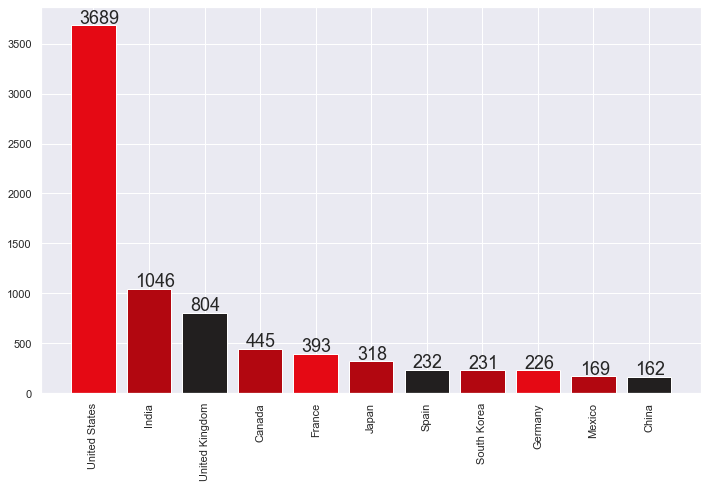

In [268]:
fig, ax = plt.subplots(1,1, figsize=(10, 6))
ax.bar(topcountries.index, topcountries['country_good'], color=lista_r)

for index,data in enumerate(topcountries['country_good']):
    plt.text(x=index - 0.25  , y= data+20 , s=f"{data}" , fontdict=dict(fontsize=18))
    
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

In [269]:
img = Image.open("Países con más contenido.png")

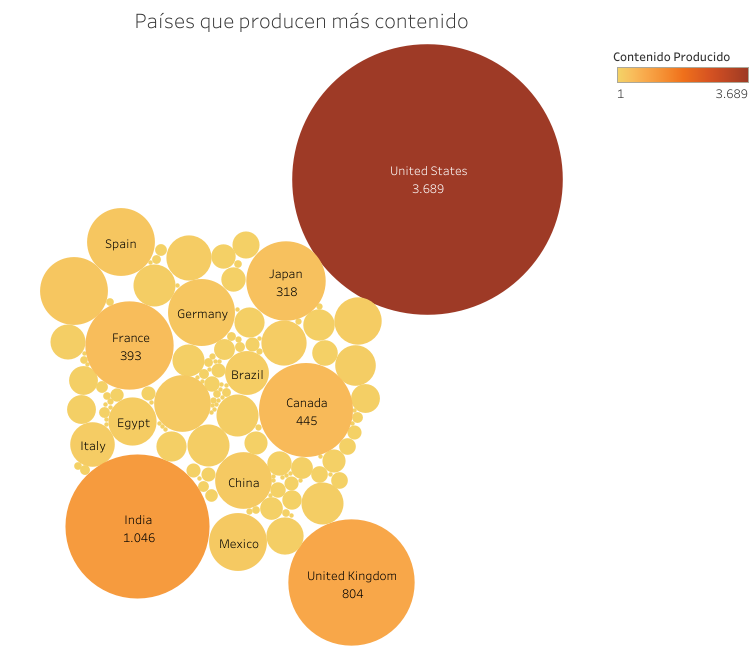

In [270]:
img

## Most popular actors/actresses

In [271]:
actors = catalog

In [272]:
actors['cast'] = actors['cast'].str.split(', ')

In [273]:
actors = actors.explode('cast', ignore_index=True)

In [274]:
actors_group = actors.groupby('cast').count().sort_values('title', ascending=False)[['title']].reset_index()[:10]

In [275]:
actors_countries = ['India', 'United Kingdom', 'Canada', 'United Kingdom', 'Canada', 'India', 
                    'United Kingdom', 'Canada', 'United Kingdom', 'Canada']

In [276]:
actors_group['country'] = actors_countries

In [277]:
actors_group

,cast,title,country
0,Anupam Kher,46,India
1,David Attenborough,45,United Kingdom
2,Vincent Tong,42,Canada
3,John Cleese,40,United Kingdom
4,Tara Strong,39,Canada
5,Shah Rukh Khan,38,India
6,Liam Neeson,36,United Kingdom
7,Andrea Libman,36,Canada
8,Alfred Molina,35,United Kingdom
9,Ashleigh Ball,35,Canada


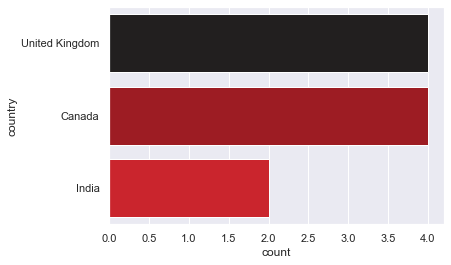

In [278]:
ax = sns.countplot(y="country", data=actors_group,
                   order=actors_group['country'].value_counts().index, palette=netflix_colors[:3])

## Length of movies

In [279]:
movies = catalog[catalog['type'] == 'Movie']

In [280]:
movies = movies[movies['duration'].notna()]

In [281]:
movies['duration_new']=movies['duration'].str.replace(' min','').astype(str).astype(int)

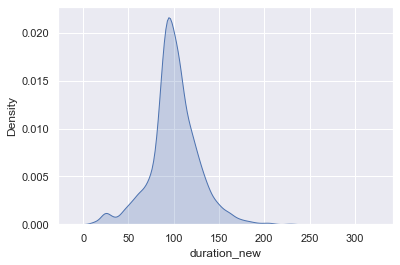

In [282]:
dur = sns.kdeplot(data=movies['duration_new'], shade=True)

Por lo tanto, una buena cantidad de películas en Netflix están entre la duración de 75-120 minutos. Es aceptable teniendo en cuenta que una buena parte del público no podría aguantar ver una película de 3 horas.

## Is there any relationship between the length of the movie and its rating?

<AxesSubplot:>

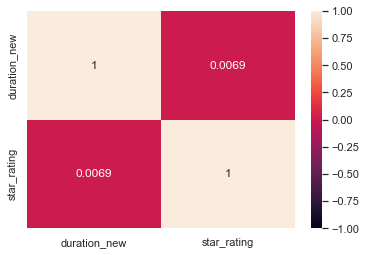

In [283]:
sns.heatmap(movies[['duration_new', 'star_rating']].corr(), vmin=-1, vmax=1, annot=True)

## TV Shows

In [284]:
tv_shows = catalog[(catalog['type'] == 'TV Show') & (catalog['duration'].notna())]

In [285]:
tv_shows['no_of_seasons'] = tv_shows['duration'].str.replace(' Seasons','')\
                                                .str.replace(' Season', '').astype(str).astype(int)

In [286]:
top15=tv_shows[0:15]
top15 = top15.sort_values('no_of_seasons', ascending=False)

In [287]:
import plotly.express as px
data = dict(
    no_of_seasons=top15['no_of_seasons'],
    title= top15['title'])
fig = px.funnel(data, x='no_of_seasons', y='title')
fig.show()

## Thank you so much!